In [36]:
# Bringing in tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    print(gpu)
    tf.config.experimental.set_memory_growth(gpu, True)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [37]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [38]:
import os
import cv2  # or use PIL for image loading
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models, optimizers, Model
import matplotlib.pyplot as plt
from IPython.display import clear_output

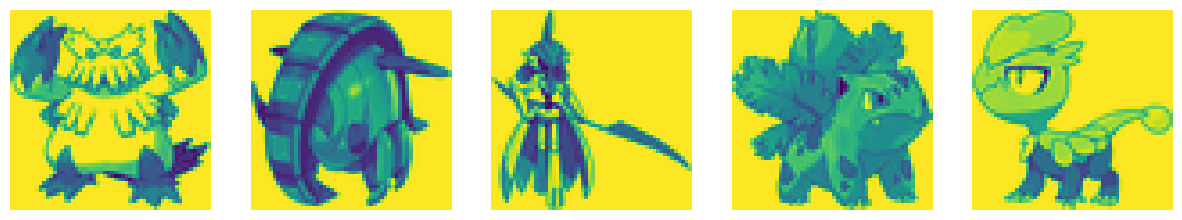

In [39]:

def load_and_preprocess_images(folder_path):
    # List all files in the folder
    image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

    num_samples = 5

    # Display sample images
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        # Read the image
        img = cv2.imread(image_files[i])  # Load image using OpenCV
        # Perform preprocessing such as resizing, normalization, etc.
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Plot the image
        plt.subplot(1, num_samples, i+1)
        plt.imshow(gray_img)
        plt.axis('off')
    
    plt.show()
    
    # Load and preprocess each image
    images = []
    for file_path in image_files:
        img = cv2.imread(file_path)  # Load image using OpenCV
        # Perform preprocessing such as resizing, normalization, etc.
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray_img = np.expand_dims(gray_img, axis=-1)
        images.append(gray_img)
    images = np.stack(images, axis=0)
    return images

# Load and preprocess images from a folder
folder_path = 'D:/NGUYEN/CV_ML/Pokemon128gray'
images = load_and_preprocess_images(folder_path)

In [40]:
print(images.shape)

(1187, 56, 56, 1)


In [92]:
def build_generator(input_shape=(100,), output_channels=1):
    model = tf.keras.Sequential()

    # Input layer
    model.add(layers.Input(shape=input_shape))

    # Dense layer
    model.add(layers.Dense(7*7*256, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Reshape to 7x7x256
    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)

    # Transposed convolutional layers
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Output layer
    model.add(layers.Conv2DTranspose(output_channels, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 56, 56, output_channels)

    return model

In [93]:
generator = build_generator()
generator.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 12544)             1254400   
                                                                 
 batch_normalization_18 (Bat  (None, 12544)            50176     
 chNormalization)                                                
                                                                 
 leaky_re_lu_32 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_5 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_18 (Conv2D  (None, 14, 14, 128)      819200    
 Transpose)                                                      
                                                                 
 batch_normalization_19 (Bat  (None, 14, 14, 128)    

1/1 [==============================] - 2s 2s/step


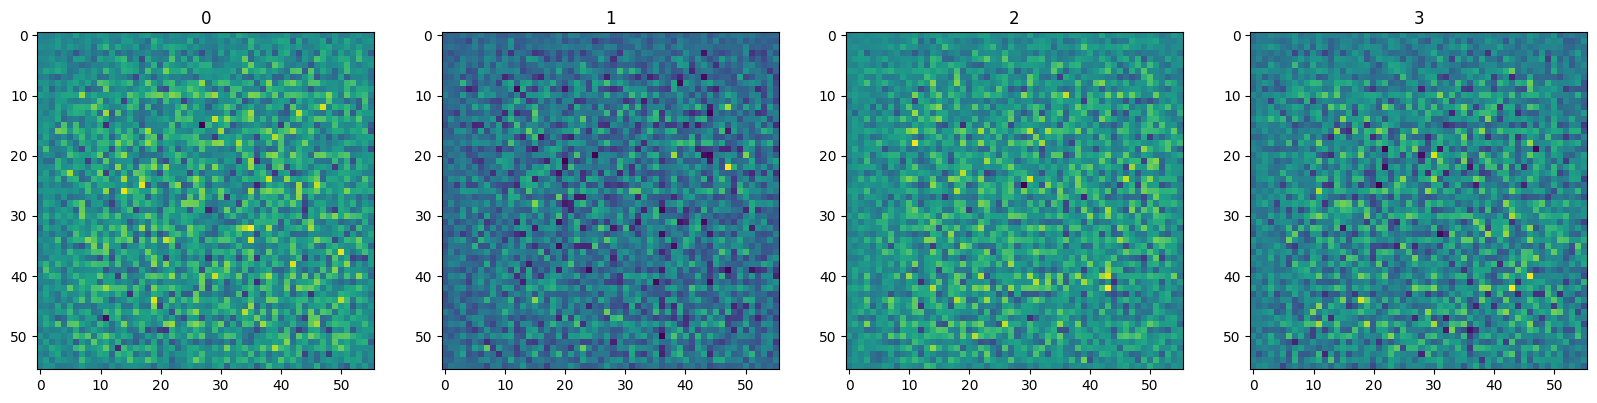

In [94]:
# Generate new fashion
img = generator.predict(np.random.randn(4,100,1))
# Setup the subplot aformatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images
for idx, sample in enumerate(img):
    # Plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(sample))
    # Appending the image label as the plot title
    ax[idx].title.set_text(idx)

In [95]:
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[56, 56, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [96]:
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        1664      
                                                                 
 leaky_re_lu_36 (LeakyReLU)  (None, 28, 28, 64)        0         
                                                                 
 dropout_14 (Dropout)        (None, 28, 28, 64)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 128)       204928    
                                                                 
 leaky_re_lu_37 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                                 
 dropout_15 (Dropout)        (None, 14, 14, 128)       0         
                                                                 
 flatten_7 (Flatten)         (None, 25088)           

In [97]:
print(img.shape)

(4, 56, 56, 1)


In [98]:
# Test discriminator
discriminator.predict(img)

1/1 [==============================] - 0s 58ms/step


array([[ 0.00206865],
       [-0.00034443],
       [ 0.00124814],
       [ 0.00046351]], dtype=float32)

In [179]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-5)

In [122]:
gen_losses = []
disc_losses = []

In [180]:
# Define the training loop
import os
import time
from IPython.display import clear_output

def train(images, epochs, batch_size):
    for epoch in range(epochs):
        epoch_gen_loss = 0
        epoch_disc_loss = 0
        num_batches = 0
        
        for image_batch in images:
            noise = tf.random.normal([batch_size, 100])

            with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
                generated_images = generator(noise, training=True)

                real_output = discriminator(image_batch, training=True)
                fake_output = discriminator(generated_images, training=True)

                gen_loss = generator_loss(fake_output)
                disc_loss = discriminator_loss(real_output, fake_output)

            gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
            gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

            generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
            discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

            epoch_gen_loss += gen_loss
            epoch_disc_loss += disc_loss
            num_batches += 1

        avg_gen_loss = epoch_gen_loss / num_batches
        avg_disc_loss = epoch_disc_loss / num_batches
        gen_losses.append(avg_gen_loss)
        disc_losses.append(avg_disc_loss)

        print(f"Epoch {epoch+1}, Generator Loss: {avg_gen_loss}, Discriminator Loss: {avg_disc_loss}")

        # Generate and save sample images every 10 epochs
        if (epoch + 1) % 10 == 0:
            clear_output(wait=True)
            generate_and_save_images(generator, epoch + 1, seed)
            viz(gen_losses, disc_losses)
        if (epoch + 1) % 1000 == 0:
            generator.save("generator.h5")
            discriminator.save("discriminator.h5")

def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(2, 2, i + 1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig(f'image_at_epoch_{epoch:04d}.png')
    plt.show()

In [181]:
# Parameters
BUFFER_SIZE = 60000
BATCH_SIZE = 32  # Reduced batch size
EPOCHS = 500
noise_dim = 100
num_examples_to_generate = 4

In [173]:
def viz(gen_losses, disc_losses):
# Plot the generator and discriminator losses
    plt.figure(figsize=(10, 5))
    plt.plot(gen_losses, label='Generator Loss')
    plt.plot(disc_losses, label='Discriminator Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Generator and Discriminator Losses Over Epochs')
    plt.show()

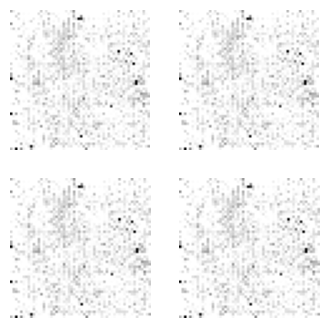

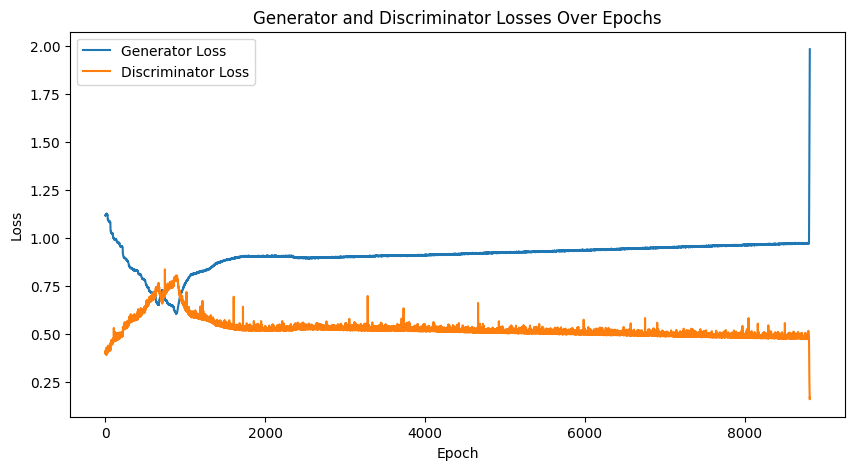

Epoch 11, Generator Loss: 1.848957896232605, Discriminator Loss: 0.17196537554264069
Epoch 12, Generator Loss: 2.143803358078003, Discriminator Loss: 0.1398133784532547
Epoch 13, Generator Loss: 2.190516710281372, Discriminator Loss: 0.12206613272428513
Epoch 14, Generator Loss: 2.2513012886047363, Discriminator Loss: 0.11208602041006088
Epoch 15, Generator Loss: 2.3981220722198486, Discriminator Loss: 0.0986139252781868


In [ ]:
seed = tf.random.normal([num_examples_to_generate, noise_dim])

train_dataset = tf.data.Dataset.from_tensor_slices(images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

train(train_dataset, EPOCHS, BATCH_SIZE)

In [177]:
generator.save("generator.h5")
discriminator.save("discriminator.h5")